In [1]:
import pandas as pd
import ast
import networkx as nx
import os
import matplotlib.pyplot as plt
# go one up
os.chdir("..")
plt.style.use("https://raw.githubusercontent.com/allfed/ALLFED-matplotlib-style-sheet/main/ALLFED.mplstyle")

In [2]:
main_color = "#5b3d91"
vos_meta = pd.read_csv(f'data{os.sep}prepared{os.sep}vos_meta.csv')
vos_meta.head()

,VOS_ID,Authors,Title,Year,Citations,Source,Cluster,Links,Total link strength,Norm. citations
0,2,['Nick Bostrom'],Existential Risk Prevention As Global Priority,2013,387.0,Global policy,3,303.0,33.0,11.8575
1,3,['Nick Bostrom'],Existential Risks: Analyzing Human Extinction ...,2002,176.0,[no source],3,61.0,24.0,3.7625
2,4,"['Shahar Avin', ' Bonnie C. Wintle', ' Julius ...",Classifying Global Catastrophic Risks,2018,68.0,Futures,3,226.0,13.0,4.6723
3,7,"['Simon Beard', ' Lauren Holt', ' Asaf Tzachor...",Assessing Climate Change’S Contribution To Glo...,2021,41.0,Futures,3,287.0,56.0,5.3588
4,8,"['Alexey Turchin', ' David Denkenberger']",Classification Of Global Catastrophic Risks Co...,2018,53.0,Ai & society,1,208.0,22.0,3.6416


In [3]:
# Create a dictionary of clusters numbers and their names
cluster_names = {1: "Artificial Intelligence", 2: "Climate Change", 3: "Foundations", 4: "Risk Policy", 5: "Pandemics", 9: "Transhumanism", 10: "Reasoning and Risk", 11: "Global Resilience and Food Security", 12: "Risk management and mitigation", 17: "Bioengineering"}

In [4]:
# Remove the unrelated clusters
num_papers_before = vos_meta.shape[0]
other_topic_clusters = [6, 7, 8, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23]
vos_meta = vos_meta[~vos_meta["Cluster"].isin(other_topic_clusters)]
num_papers_after = vos_meta.shape[0]
print(f"Removed {num_papers_before - num_papers_after} papers from unrelated clusters")

Removed 454 papers from unrelated clusters


In [5]:
nums = {}
for cluster_name, cluster in vos_meta.groupby("Cluster"):
    num_papers = cluster.shape[0]
    authors = cluster["Authors"].apply(ast.literal_eval)
    # Create a list of all the authors
    all_authors = [author for authors_list in authors for author in authors_list]
    # Remove the trailing whitespace from the authors
    all_authors = [author.strip() for author in all_authors]
    all_authors = [author for author in all_authors if author != ""]
    # Count how often each author appears
    author_counts_unique = len(set(all_authors))
    author_counts = len(all_authors)
    nums[cluster_name] = {"num_papers": num_papers, "num_authors_unique": author_counts_unique, "num_authors": author_counts}
nums

{1: {'num_papers': 329, 'num_authors_unique': 599, 'num_authors': 683},
 2: {'num_papers': 226, 'num_authors_unique': 635, 'num_authors': 671},
 3: {'num_papers': 221, 'num_authors_unique': 364, 'num_authors': 496},
 4: {'num_papers': 140, 'num_authors_unique': 273, 'num_authors': 283},
 5: {'num_papers': 106, 'num_authors_unique': 327, 'num_authors': 357},
 9: {'num_papers': 67, 'num_authors_unique': 83, 'num_authors': 110},
 10: {'num_papers': 50, 'num_authors_unique': 91, 'num_authors': 105},
 11: {'num_papers': 48, 'num_authors_unique': 94, 'num_authors': 179},
 12: {'num_papers': 40, 'num_authors_unique': 88, 'num_authors': 90},
 17: {'num_papers': 22, 'num_authors_unique': 84, 'num_authors': 97}}

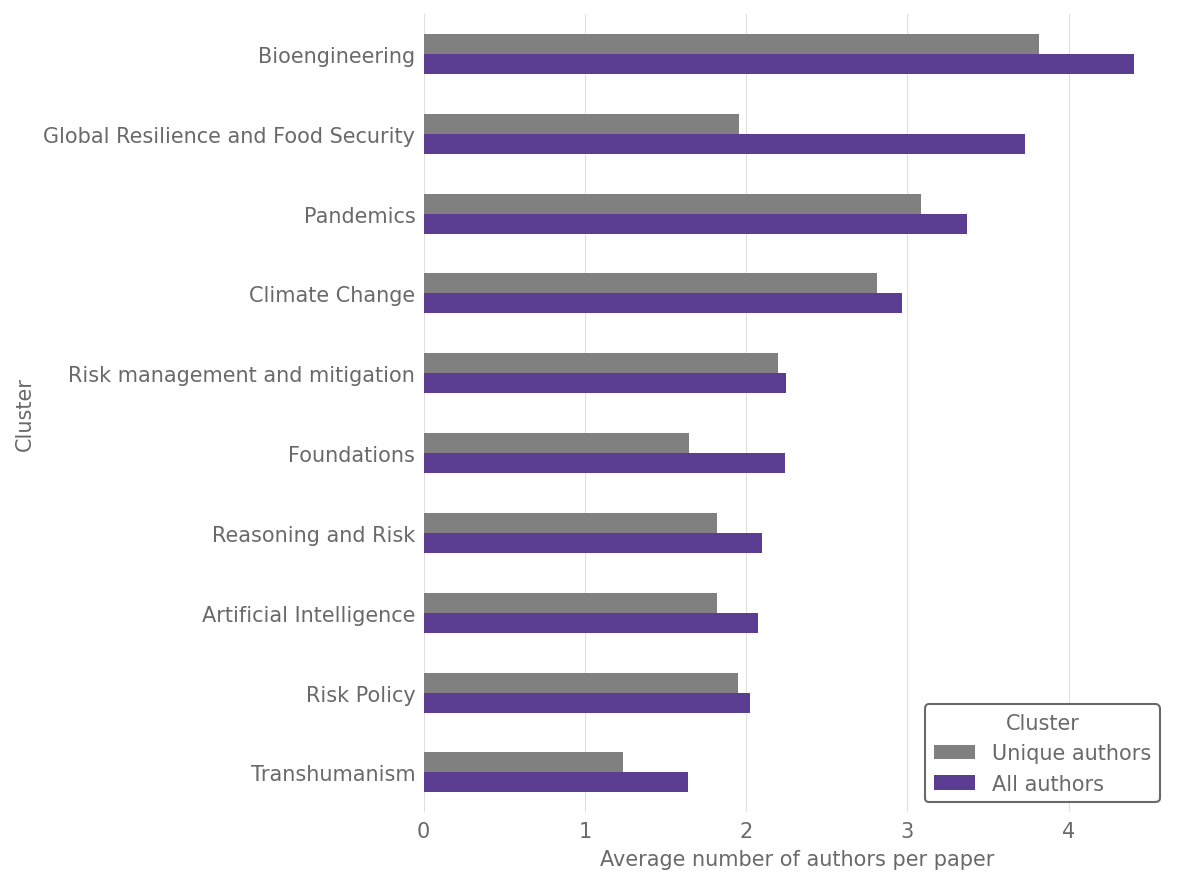

In [6]:
# Plot the average number of authors per paper
df = pd.DataFrame(nums).T
df.index = ["Artificial Intelligence", "Climate Change", "Foundations", "Risk Policy", "Pandemics", "Transhumanism", "Reasoning and Risk", "Global Resilience and Food Security", "Risk management and mitigation", "Bioengineering"]
df["avg_authors"] = df["num_authors"] / df["num_papers"]
df["avg_authors_unique"] = df["num_authors_unique"] / df["num_papers"]
# Plot the average number of authors per paper and the average number of unique authors per paper
# Next to each other and per cluster
fig, ax = plt.subplots(figsize=(8, 6))
df[["avg_authors", "avg_authors_unique"]].sort_values(by="avg_authors").plot(kind="barh", ax=ax, color=[main_color, "gray"])
# Make legend more descriptive
ax.set_xlabel("Average number of authors per document")
ax.set_ylabel("Cluster")
# remove y grid
ax.yaxis.grid(False)
plt.tight_layout()
# Get the handles and labels from the current legend
handles, labels = ax.get_legend_handles_labels()

# Reverse the order of both handles and labels
ax.legend(handles[::-1], [ "Unique authors", "All authors"], title="Cluster")


Text(0.5, 210.8333333333333, 'Number of papers')

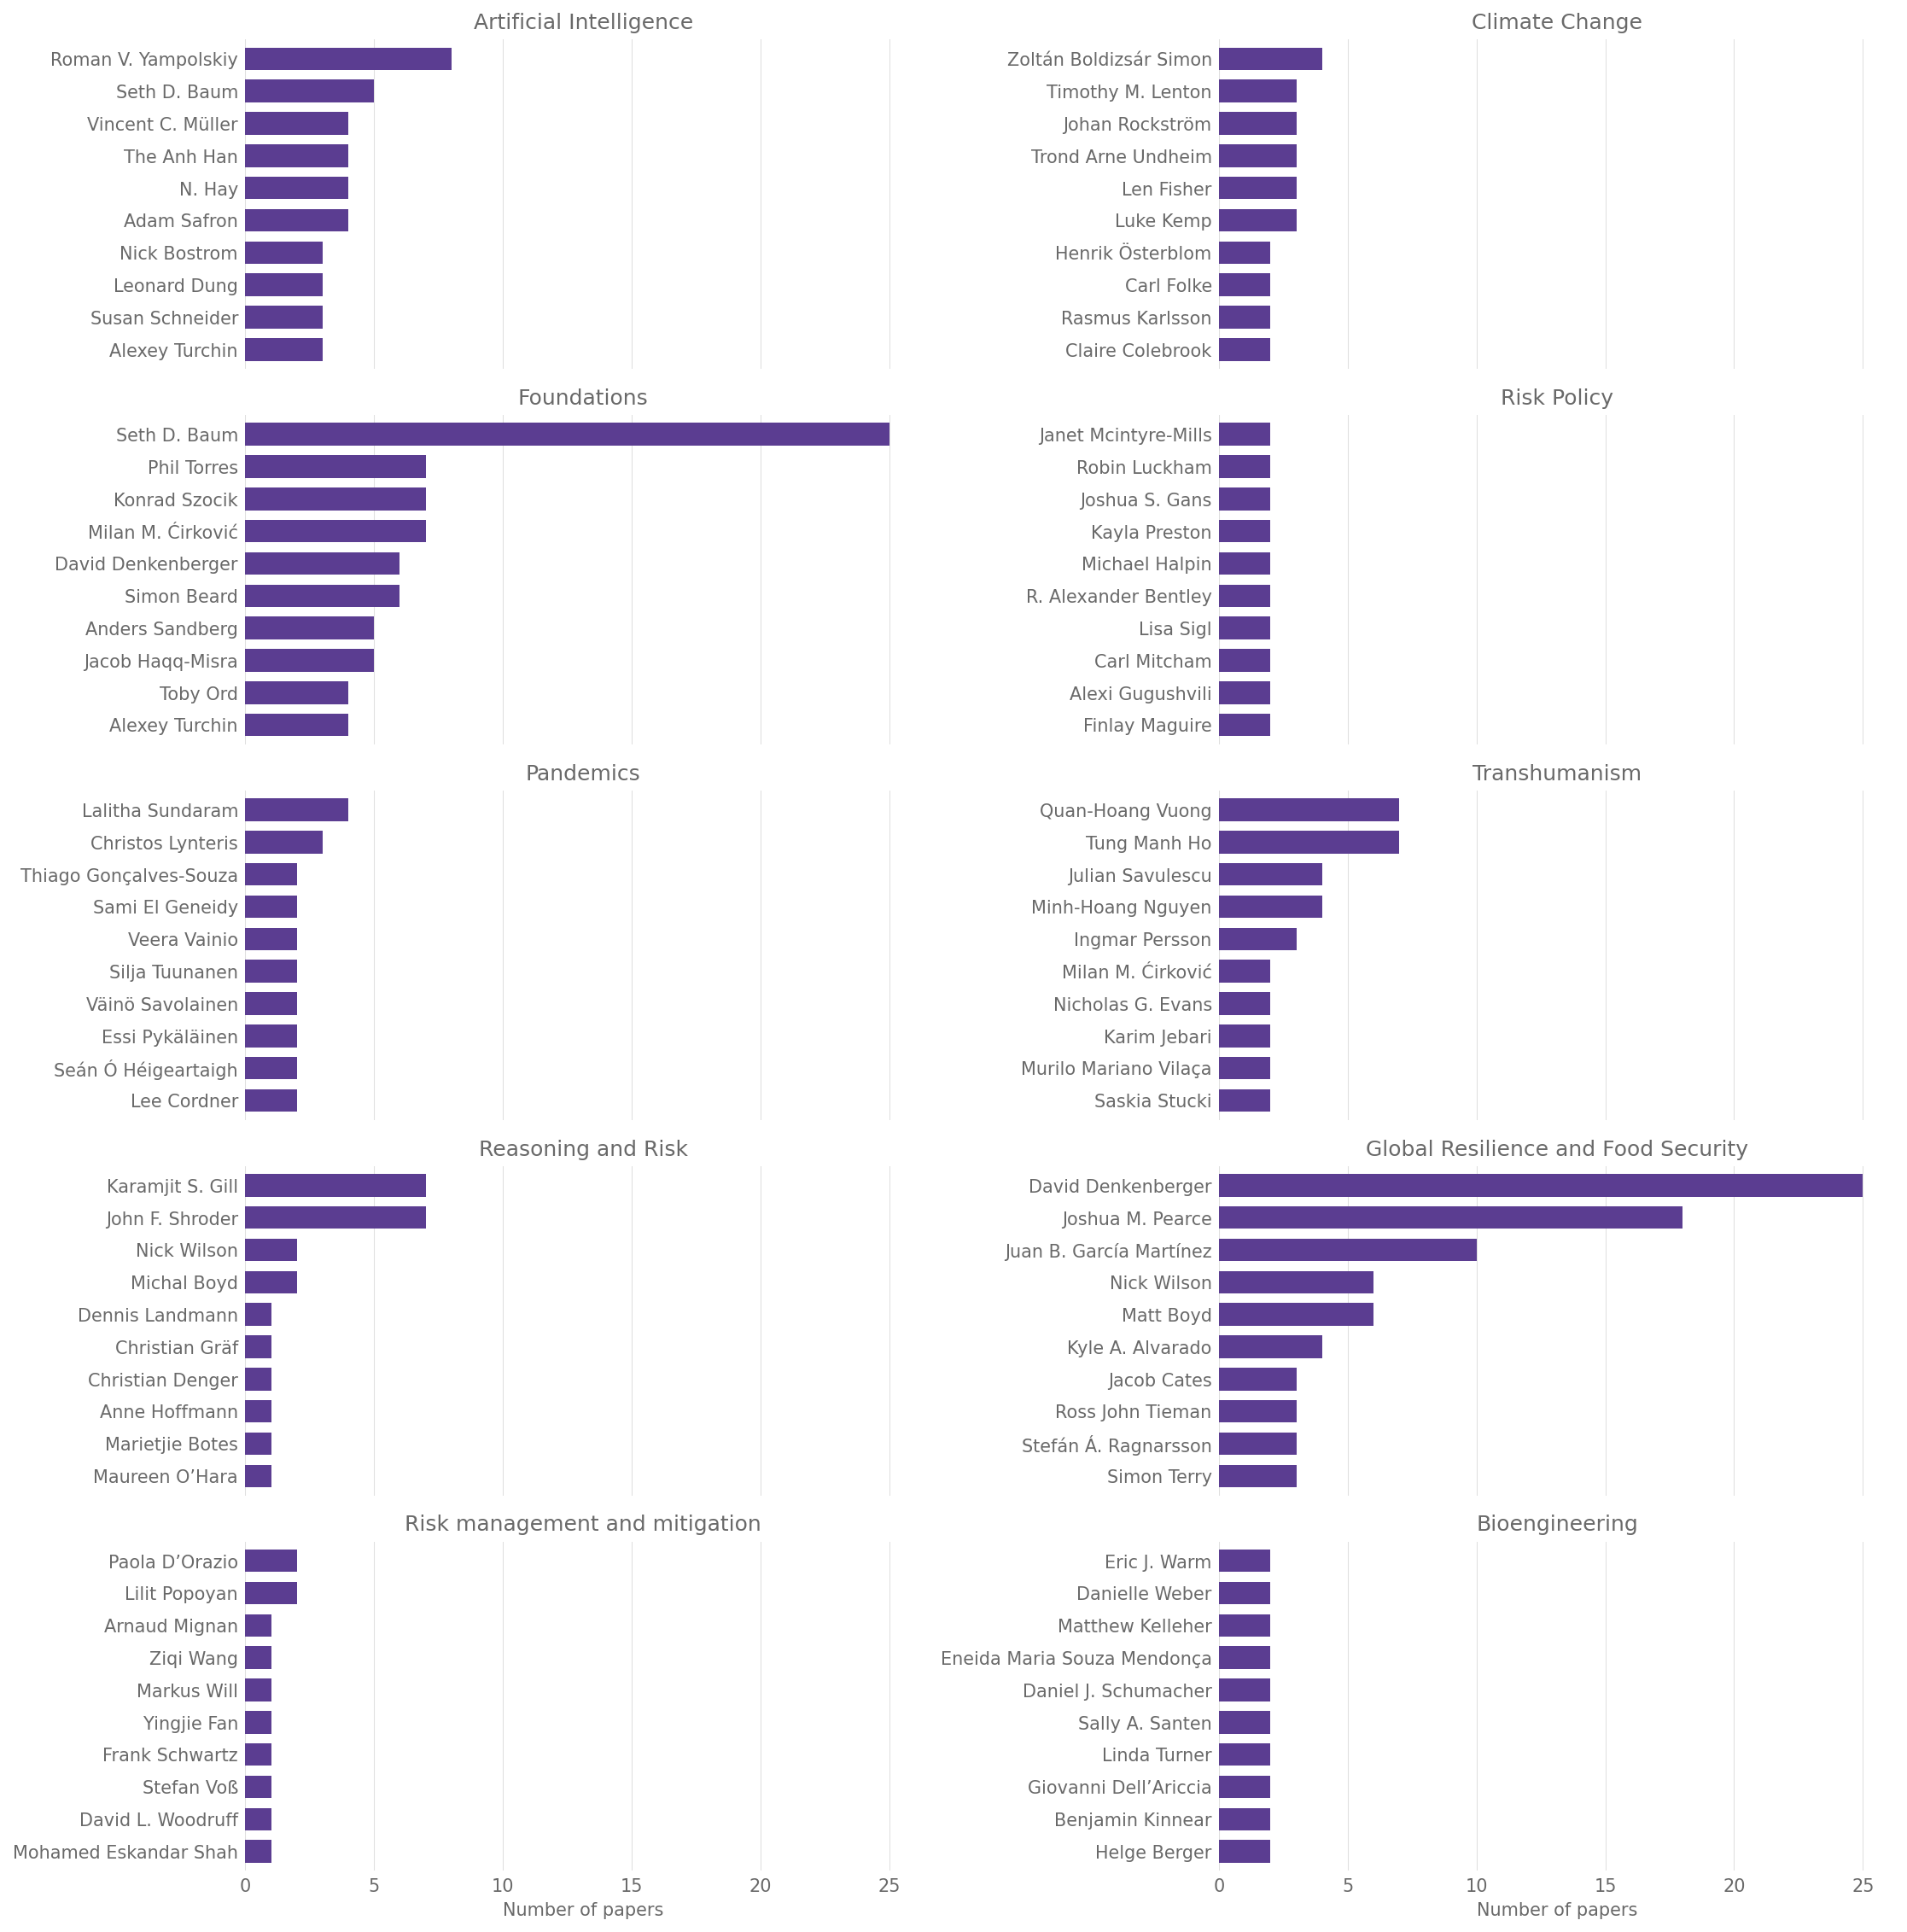

In [13]:
# Calculate the main authors per cluser. 
fig, axes = plt.subplots(5,2, figsize=(15, 15), sharex=True)
axes = axes.flatten()

for i, (cluster_name, cluster) in enumerate(vos_meta.groupby("Cluster")):
    authors = cluster["Authors"].apply(ast.literal_eval)
    # Create a list of all the authors
    all_authors = [author for authors_list in authors for author in authors_list]
    # Remove the trailing whitespace from the authors
    all_authors = [author.strip() for author in all_authors]
    # Remove the empty authors
    all_authors = [author for author in all_authors if author != ""]
    # Count how often each author appears
    author_counts = pd.Series(all_authors).value_counts()
    author_counts.head(10).sort_values().plot(kind="barh", color=main_color, width=0.7, ax=axes[i])
    # Remove the y-axis grid
    axes[i].yaxis.grid(False)
    # Add the title
    axes[i].set_title(cluster_names[cluster_name])
fig.tight_layout()


# Add the x-axis label
axes[-2].set_xlabel("Number of documents")
axes[-1].set_xlabel("Number of documents")

In [8]:
remerged_data = pd.read_csv(f'data{os.sep}prepared{os.sep}remerged_data.csv')
# Remove the unrelated clusters
other_topic_clusters = [6, 7, 8, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23]

remerged_data = remerged_data[~remerged_data["Cluster"].isin(other_topic_clusters)]
remerged_data.head()

,VOS_ID,Authors,Title,Year,Citations,Source,Cluster,Links,Total link strength,Norm. citations,...,locations.source.type,locations.source,sustainable_development_goals.id,sustainable_development_goals.display_name,sustainable_development_goals.score,grants.funder,grants.funder_display_name,grants.award_id,counts_by_year.year,counts_by_year.cited_by_count
0,476,"['Nina Rosenbusch', ' Jan Brinckmann', ' Andre...",Is Innovation Always Beneficial? A Meta-Analys...,2011,1435.0,Journal of business venturing,4,96.0,34.0,23.4502,...,journal|repository,nan|nan,https://metadata.un.org/sdg/9,"Industry, innovation and infrastructure",0.63,NaN,NaN,NaN,2024|2023|2022|2021|2020|2019|2018|2017|2016|2...,40|130|144|152|159|144|127|99|121|95|99|62|38
3,365,"['Nick Bostrom', ' Eliezer Yudkowsky']",The Ethics Of Artificial Intelligence,2014,412.0,Cambridge university press ebooks,1,270.0,9.0,20.7529,...,ebook platform|repository,nan|nan,https://metadata.un.org/sdg/16,"Peace, justice, and strong institutions",0.48,NaN,NaN,NaN,2024|2023|2022|2021|2020|2019|2018|2017|2016|2...,24|48|63|81|77|59|22|14|7|1|3|1
5,2,['Nick Bostrom'],Existential Risk Prevention As Global Priority,2013,387.0,Global policy,3,303.0,33.0,11.8575,...,journal,NaN,https://metadata.un.org/sdg/12|https://metadat...,Responsible consumption and production|Life on...,0.43|0.42,NaN,NaN,NaN,2024|2023|2022|2021|2020|2019|2018|2017|2016|2...,67|38|41|50|47|34|30|20|20|16|14|4
6,526,"['Theodore G. Shepherd', ' Emily Boyd', ' Raph...",Storylines: An Alternative Approach To Represe...,2018,347.0,Climatic change,3,29.0,12.0,23.8425,...,journal|repository|repository|repository|repos...,nan|nan|nan|nan|nan|nan|nan|nan|nan|nan|nan|na...,https://metadata.un.org/sdg/13,Climate action,0.81,https://openalex.org/F4320320006|https://opena...,Royal Society|H2020 European Research Council,IS150011|339390,2024|2023|2022|2021|2020|2019|2018,50|108|66|73|42|11|1
7,605,['Ole Wæver'],European Security Identities,1996,315.0,Journal of common market studies,5,10.0,8.0,3.5795,...,journal,NaN,https://metadata.un.org/sdg/10,Reduced inequalities,0.51,NaN,NaN,NaN,2024|2023|2022|2021|2020|2019|2018|2017|2016|2...,18|20|9|9|13|8|11|9|15|8|15|12|12


/tmp/ipykernel_35749/4224810067.py:18: UserWarning: Glyph 152 (\x98) missing from current font.
  fig.tight_layout()
/tmp/ipykernel_35749/4224810067.py:18: UserWarning: Glyph 156 (\x9c) missing from current font.
  fig.tight_layout()


Text(0.5, 210.8333333333333, 'Number of papers')

/home/florian/local/anaconda3/envs/bibliometrics/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 152 (\x98) missing from current font.
  func(*args, **kwargs)
/home/florian/local/anaconda3/envs/bibliometrics/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 156 (\x9c) missing from current font.
  func(*args, **kwargs)
/home/florian/local/anaconda3/envs/bibliometrics/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 152 (\x98) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/florian/local/anaconda3/envs/bibliometrics/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 156 (\x9c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


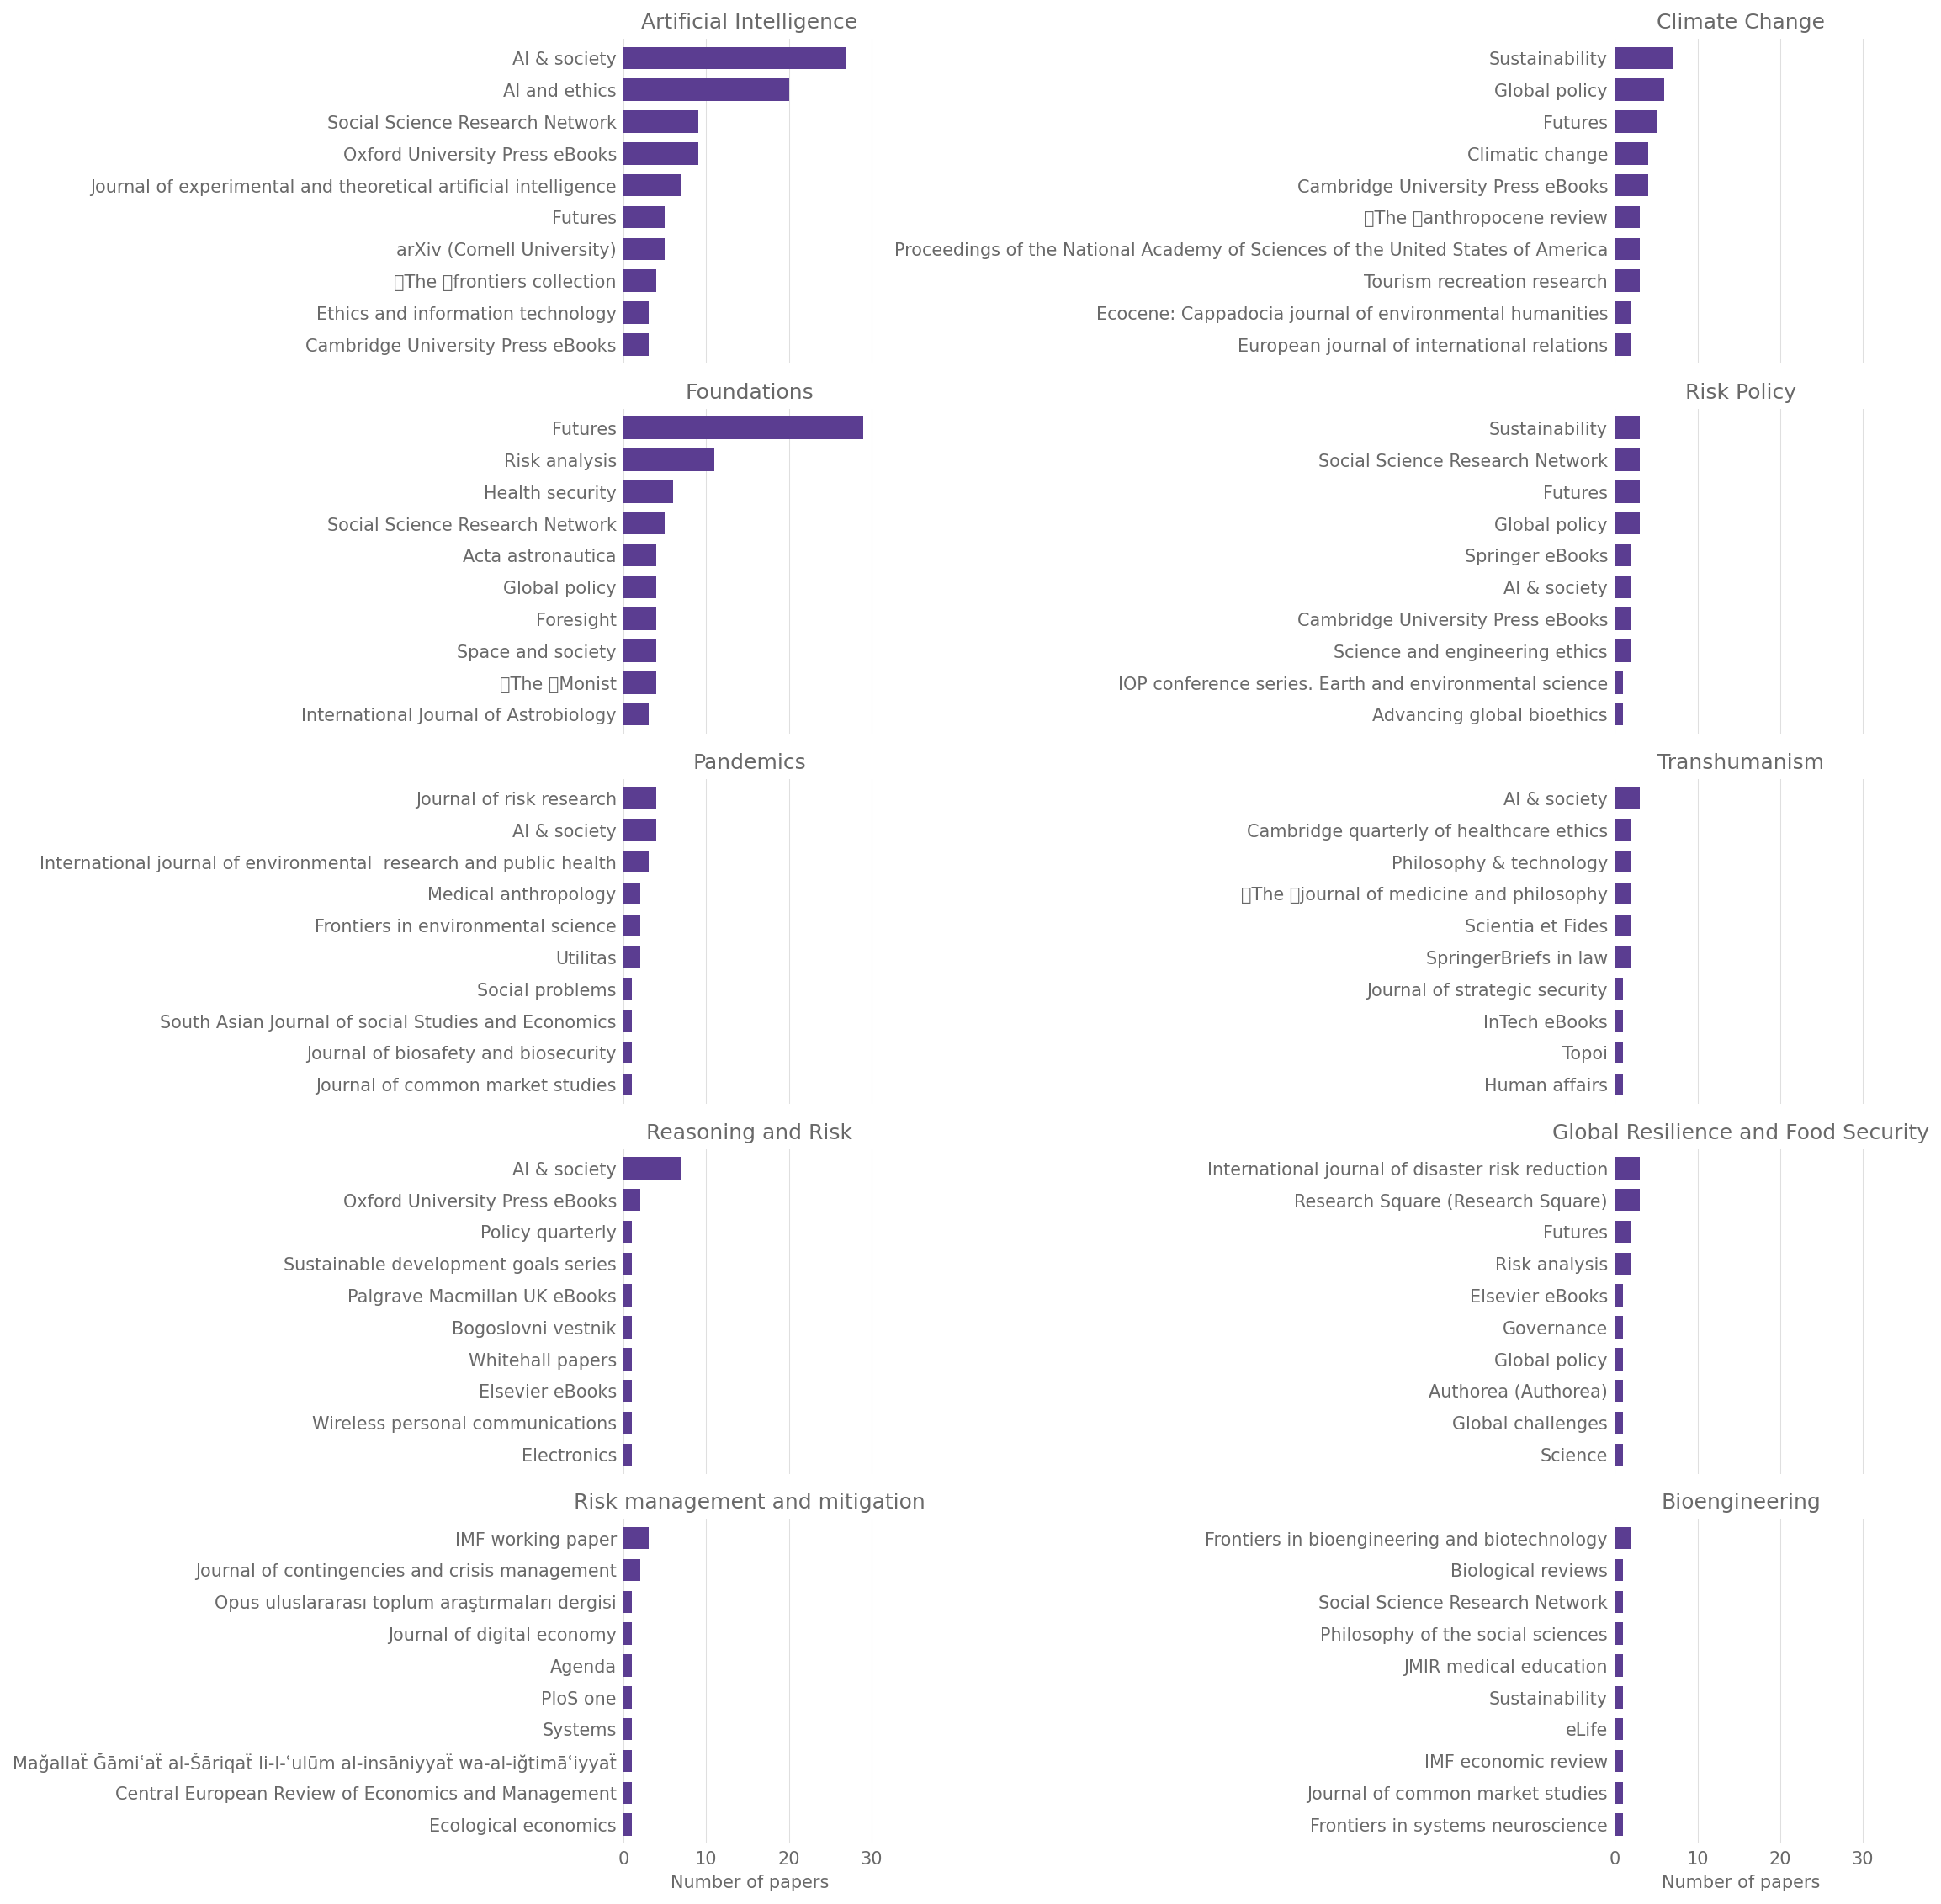

In [9]:
# Plot the main source by cluster
fig, axes = plt.subplots(5,2, figsize=(15, 15), sharex=True)
axes = axes.flatten()

for i, (cluster_name, cluster) in enumerate(remerged_data.groupby("Cluster")):
    sources = cluster["primary_location.source.display_name"].value_counts()
    # remove "[no source]" from the sources
    sources = sources.drop("[no source]", errors="ignore")
    # In the jounarl names containing "/" remove the part after the "/"
    sources.index = sources.index.str.split("/").str[0]
    sources.head(10).sort_values().plot(kind="barh", color=main_color, width=0.7, ax=axes[i])
    # Remove the y-axis grid
    axes[i].yaxis.grid(False)
    # Add the title
    axes[i].set_title(cluster_names[cluster_name])
    axes[i].set_ylabel("")

fig.tight_layout()

# Add the x-axis label
axes[-2].set_xlabel("Number of documents")
axes[-1].set_xlabel("Number of documents")

Text(0.5, 210.8333333333333, 'Number of Author Affiliations from Country')

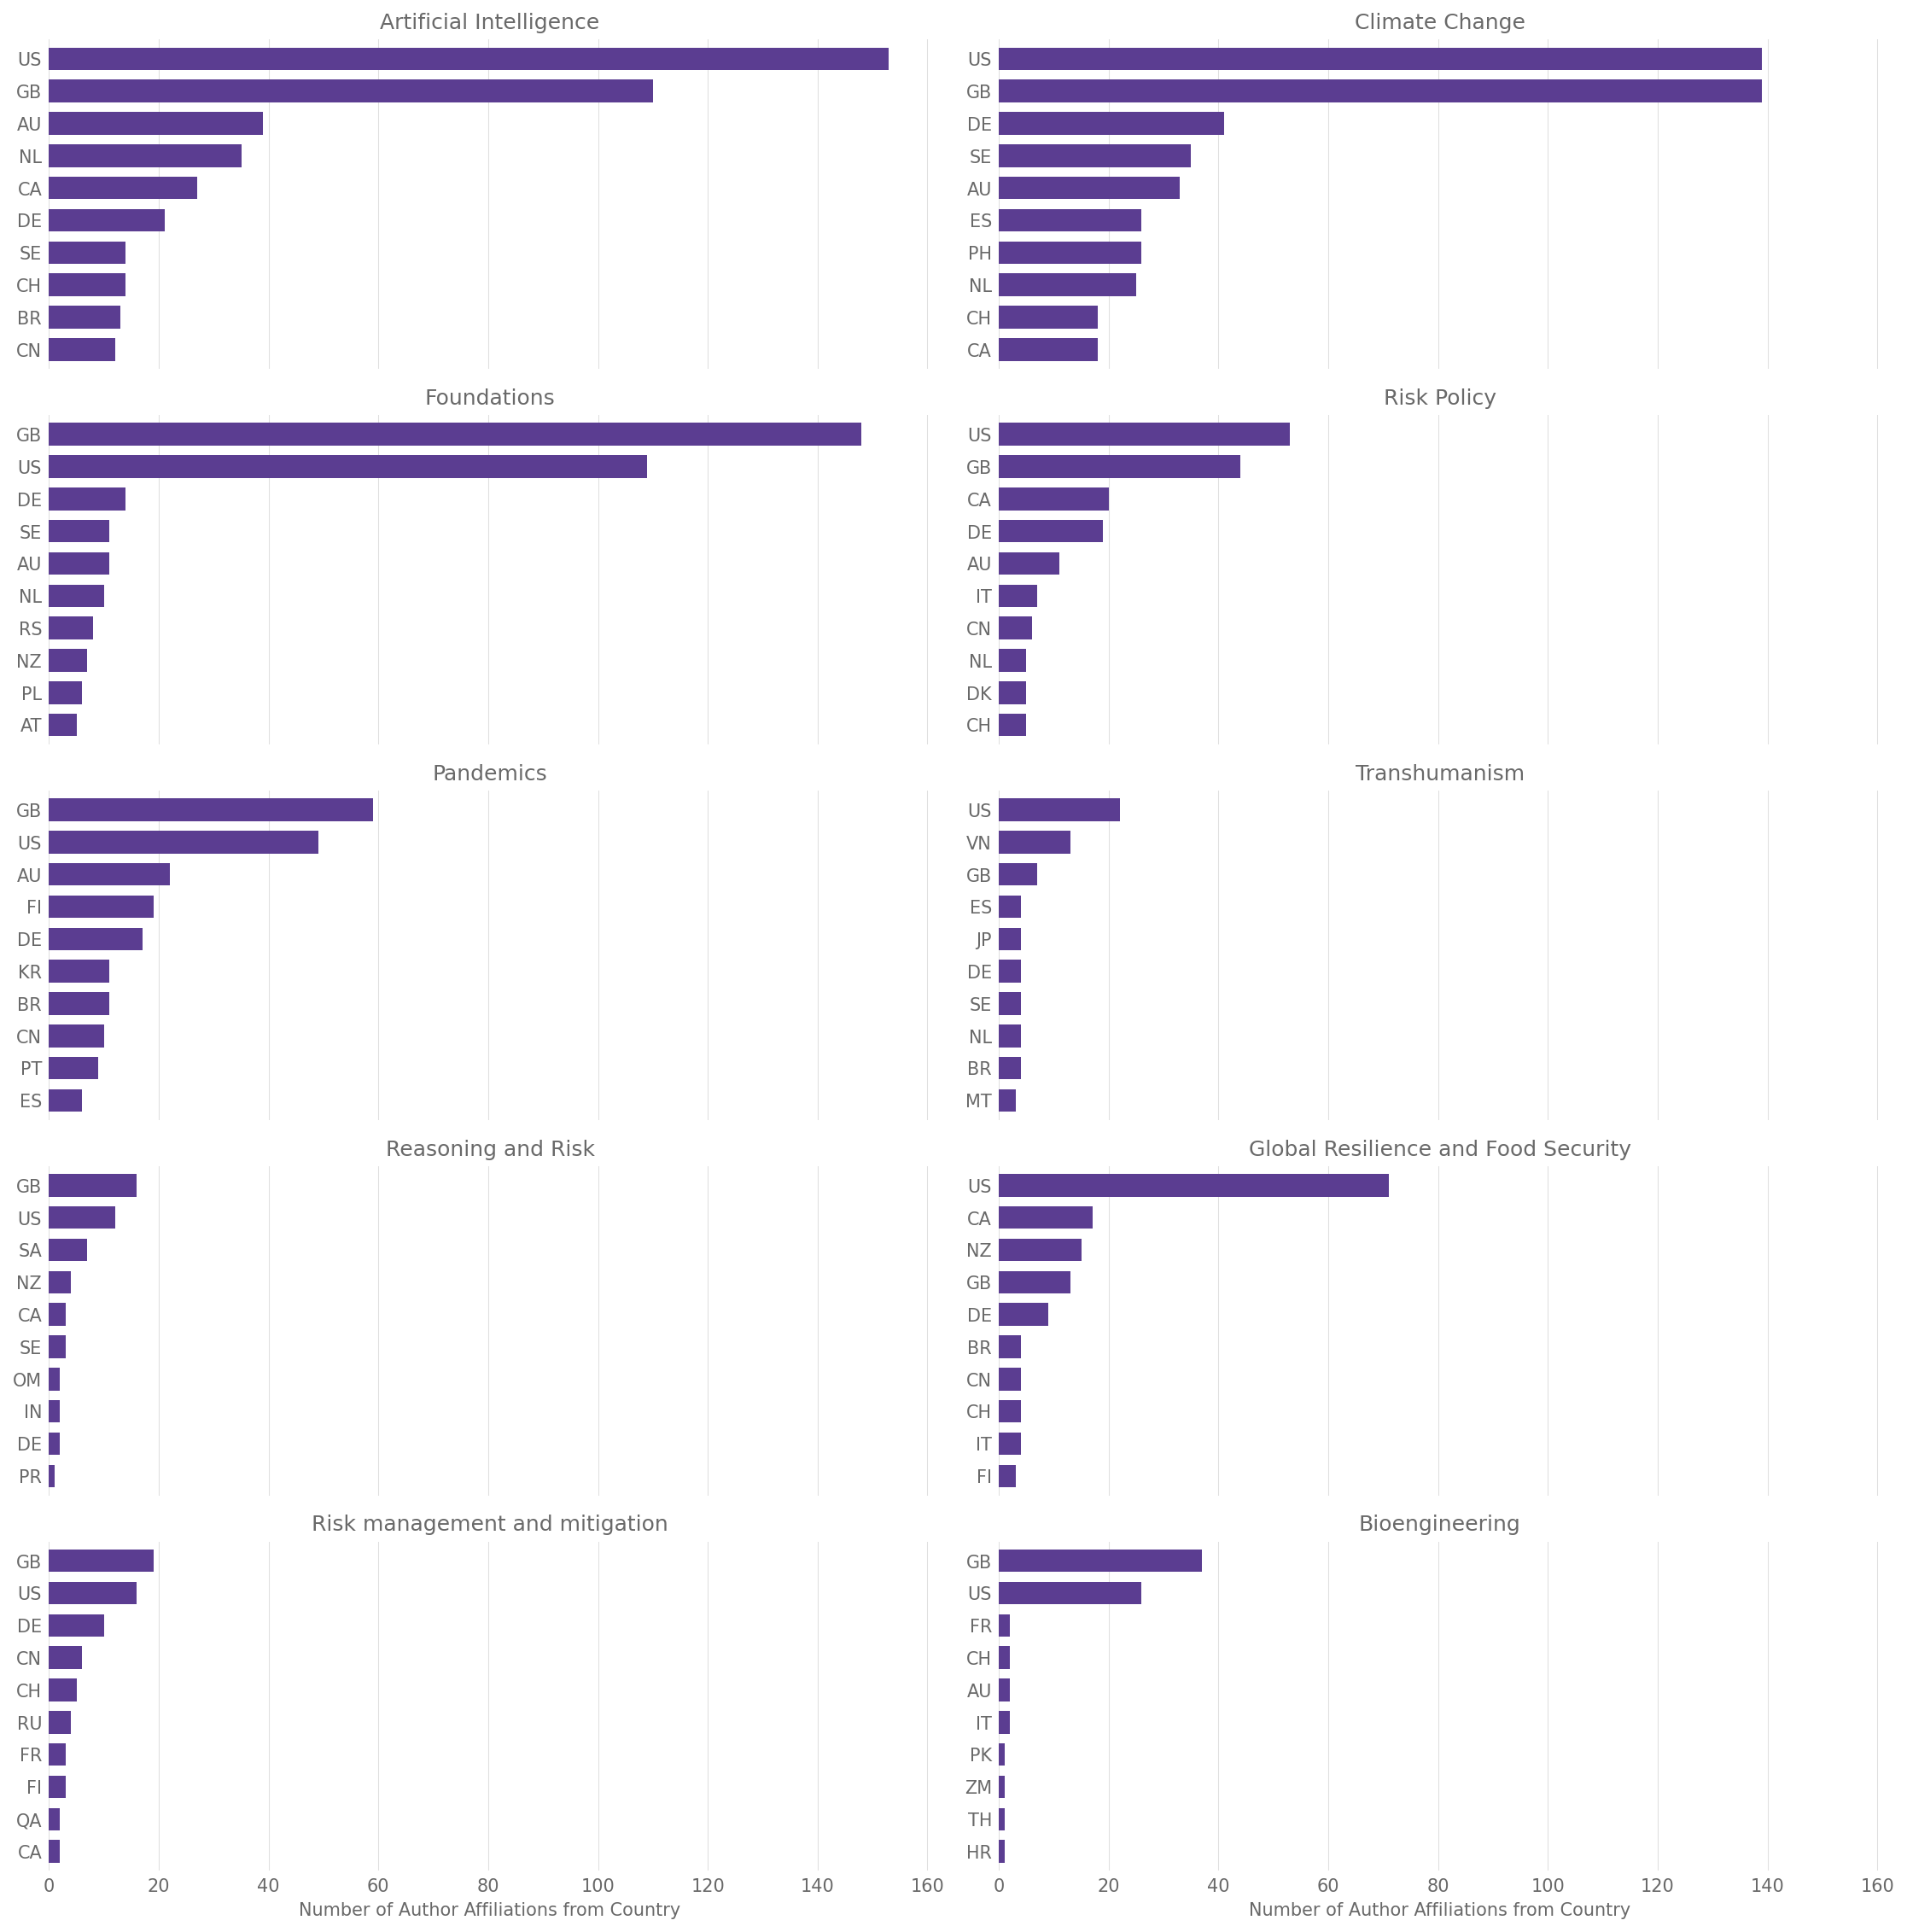

In [10]:
# Plot the main source by cluster
fig, axes = plt.subplots(5,2, figsize=(15, 15), sharex=True)
axes = axes.flatten()

for i, (cluster_name, cluster) in enumerate(remerged_data.groupby("Cluster")):
    countries = cluster["authorships.countries"].str.split("|").explode().value_counts()
    countries = countries.drop("")

    countries.head(10).sort_values().plot(kind="barh", color=main_color, width=0.7, ax=axes[i])
    # Remove the y-axis grid
    axes[i].yaxis.grid(False)
    # Add the title
    axes[i].set_title(cluster_names[cluster_name])
    axes[i].set_ylabel("")

fig.tight_layout()

# Add the x-axis label
axes[-2].set_xlabel("Number of Author Affiliations from Country")
axes[-1].set_xlabel("Number of Author Affiliations from Country")

Text(0.5, 210.8333333333333, 'Keyword Mentions')

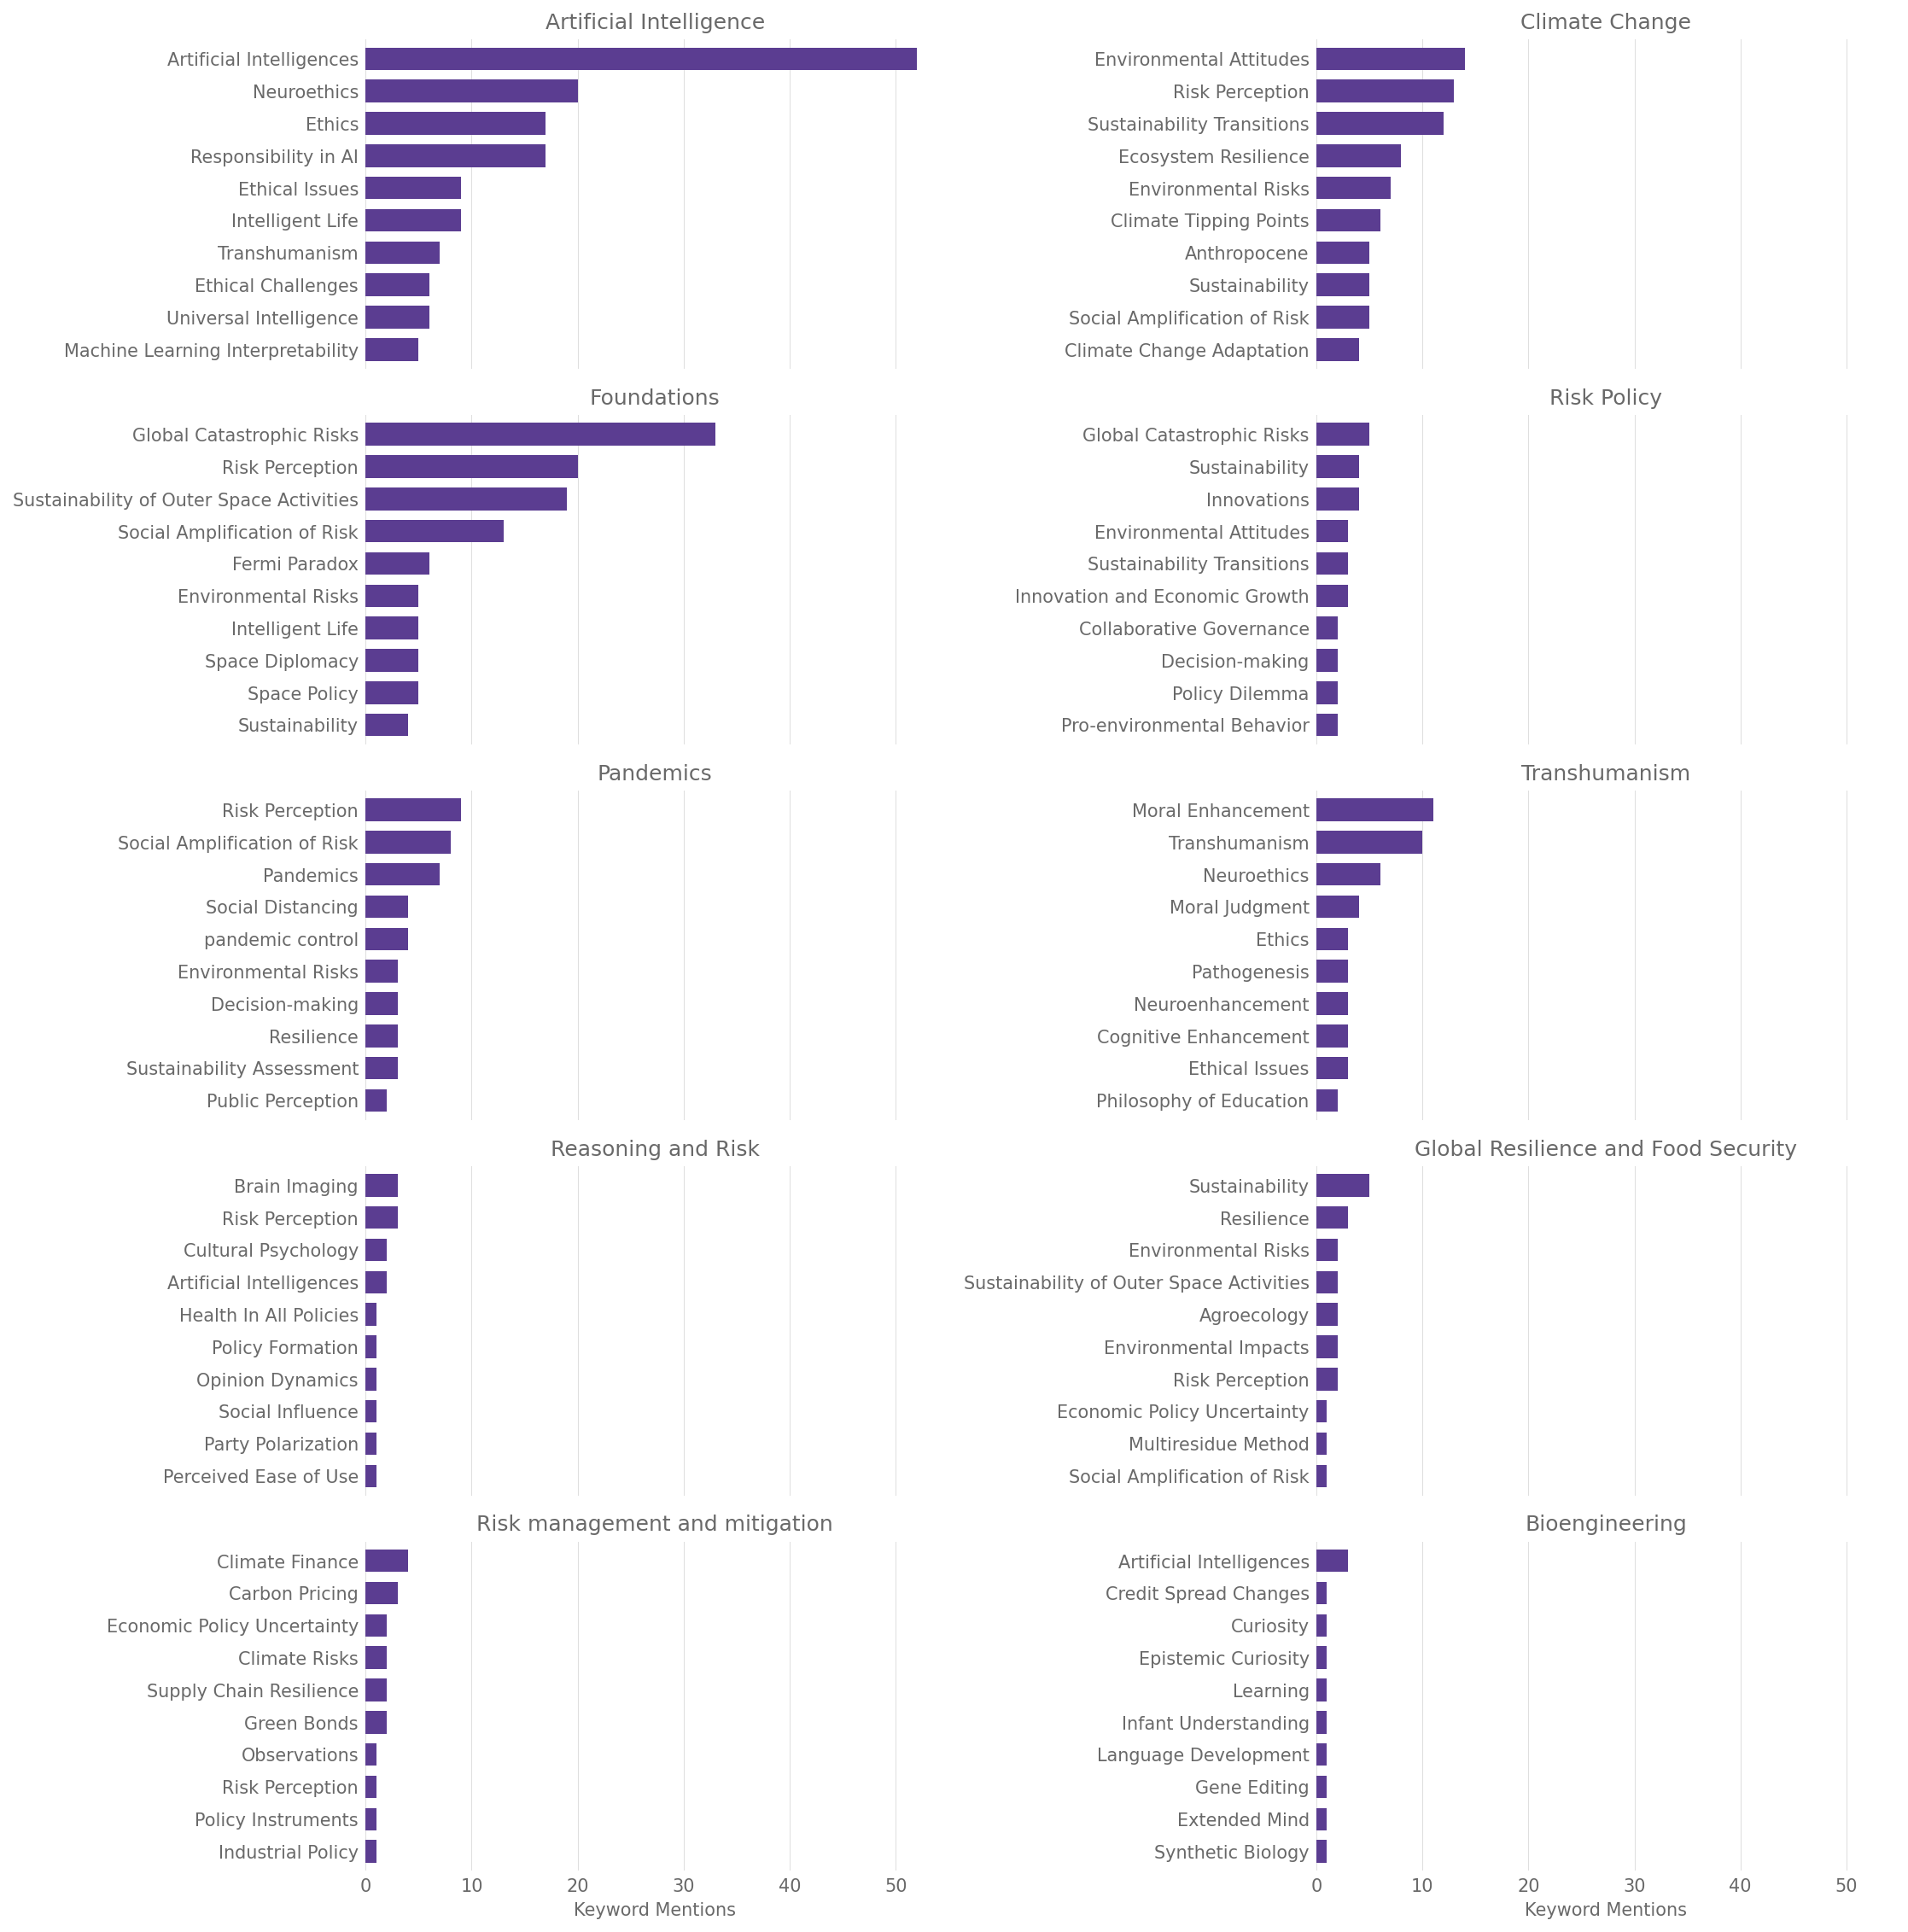

In [11]:
# Plot the main source by cluster
fig, axes = plt.subplots(5,2, figsize=(15, 15), sharex=True)
axes = axes.flatten()

for i, (cluster_name, cluster) in enumerate(remerged_data.groupby("Cluster")):
    countries = cluster["keywords.display_name"].str.split("|").explode().value_counts()

    countries.head(10).sort_values().plot(kind="barh", color=main_color, width=0.7, ax=axes[i])
    # Remove the y-axis grid
    axes[i].yaxis.grid(False)
    # Add the title
    axes[i].set_title(cluster_names[cluster_name])
    axes[i].set_ylabel("")

fig.tight_layout()

# Add the x-axis label
axes[-2].set_xlabel("Keyword Mentions")
axes[-1].set_xlabel("Keyword Mentions")

Text(0.5, 210.8333333333333, 'Number of Author Affiliations from Institution')

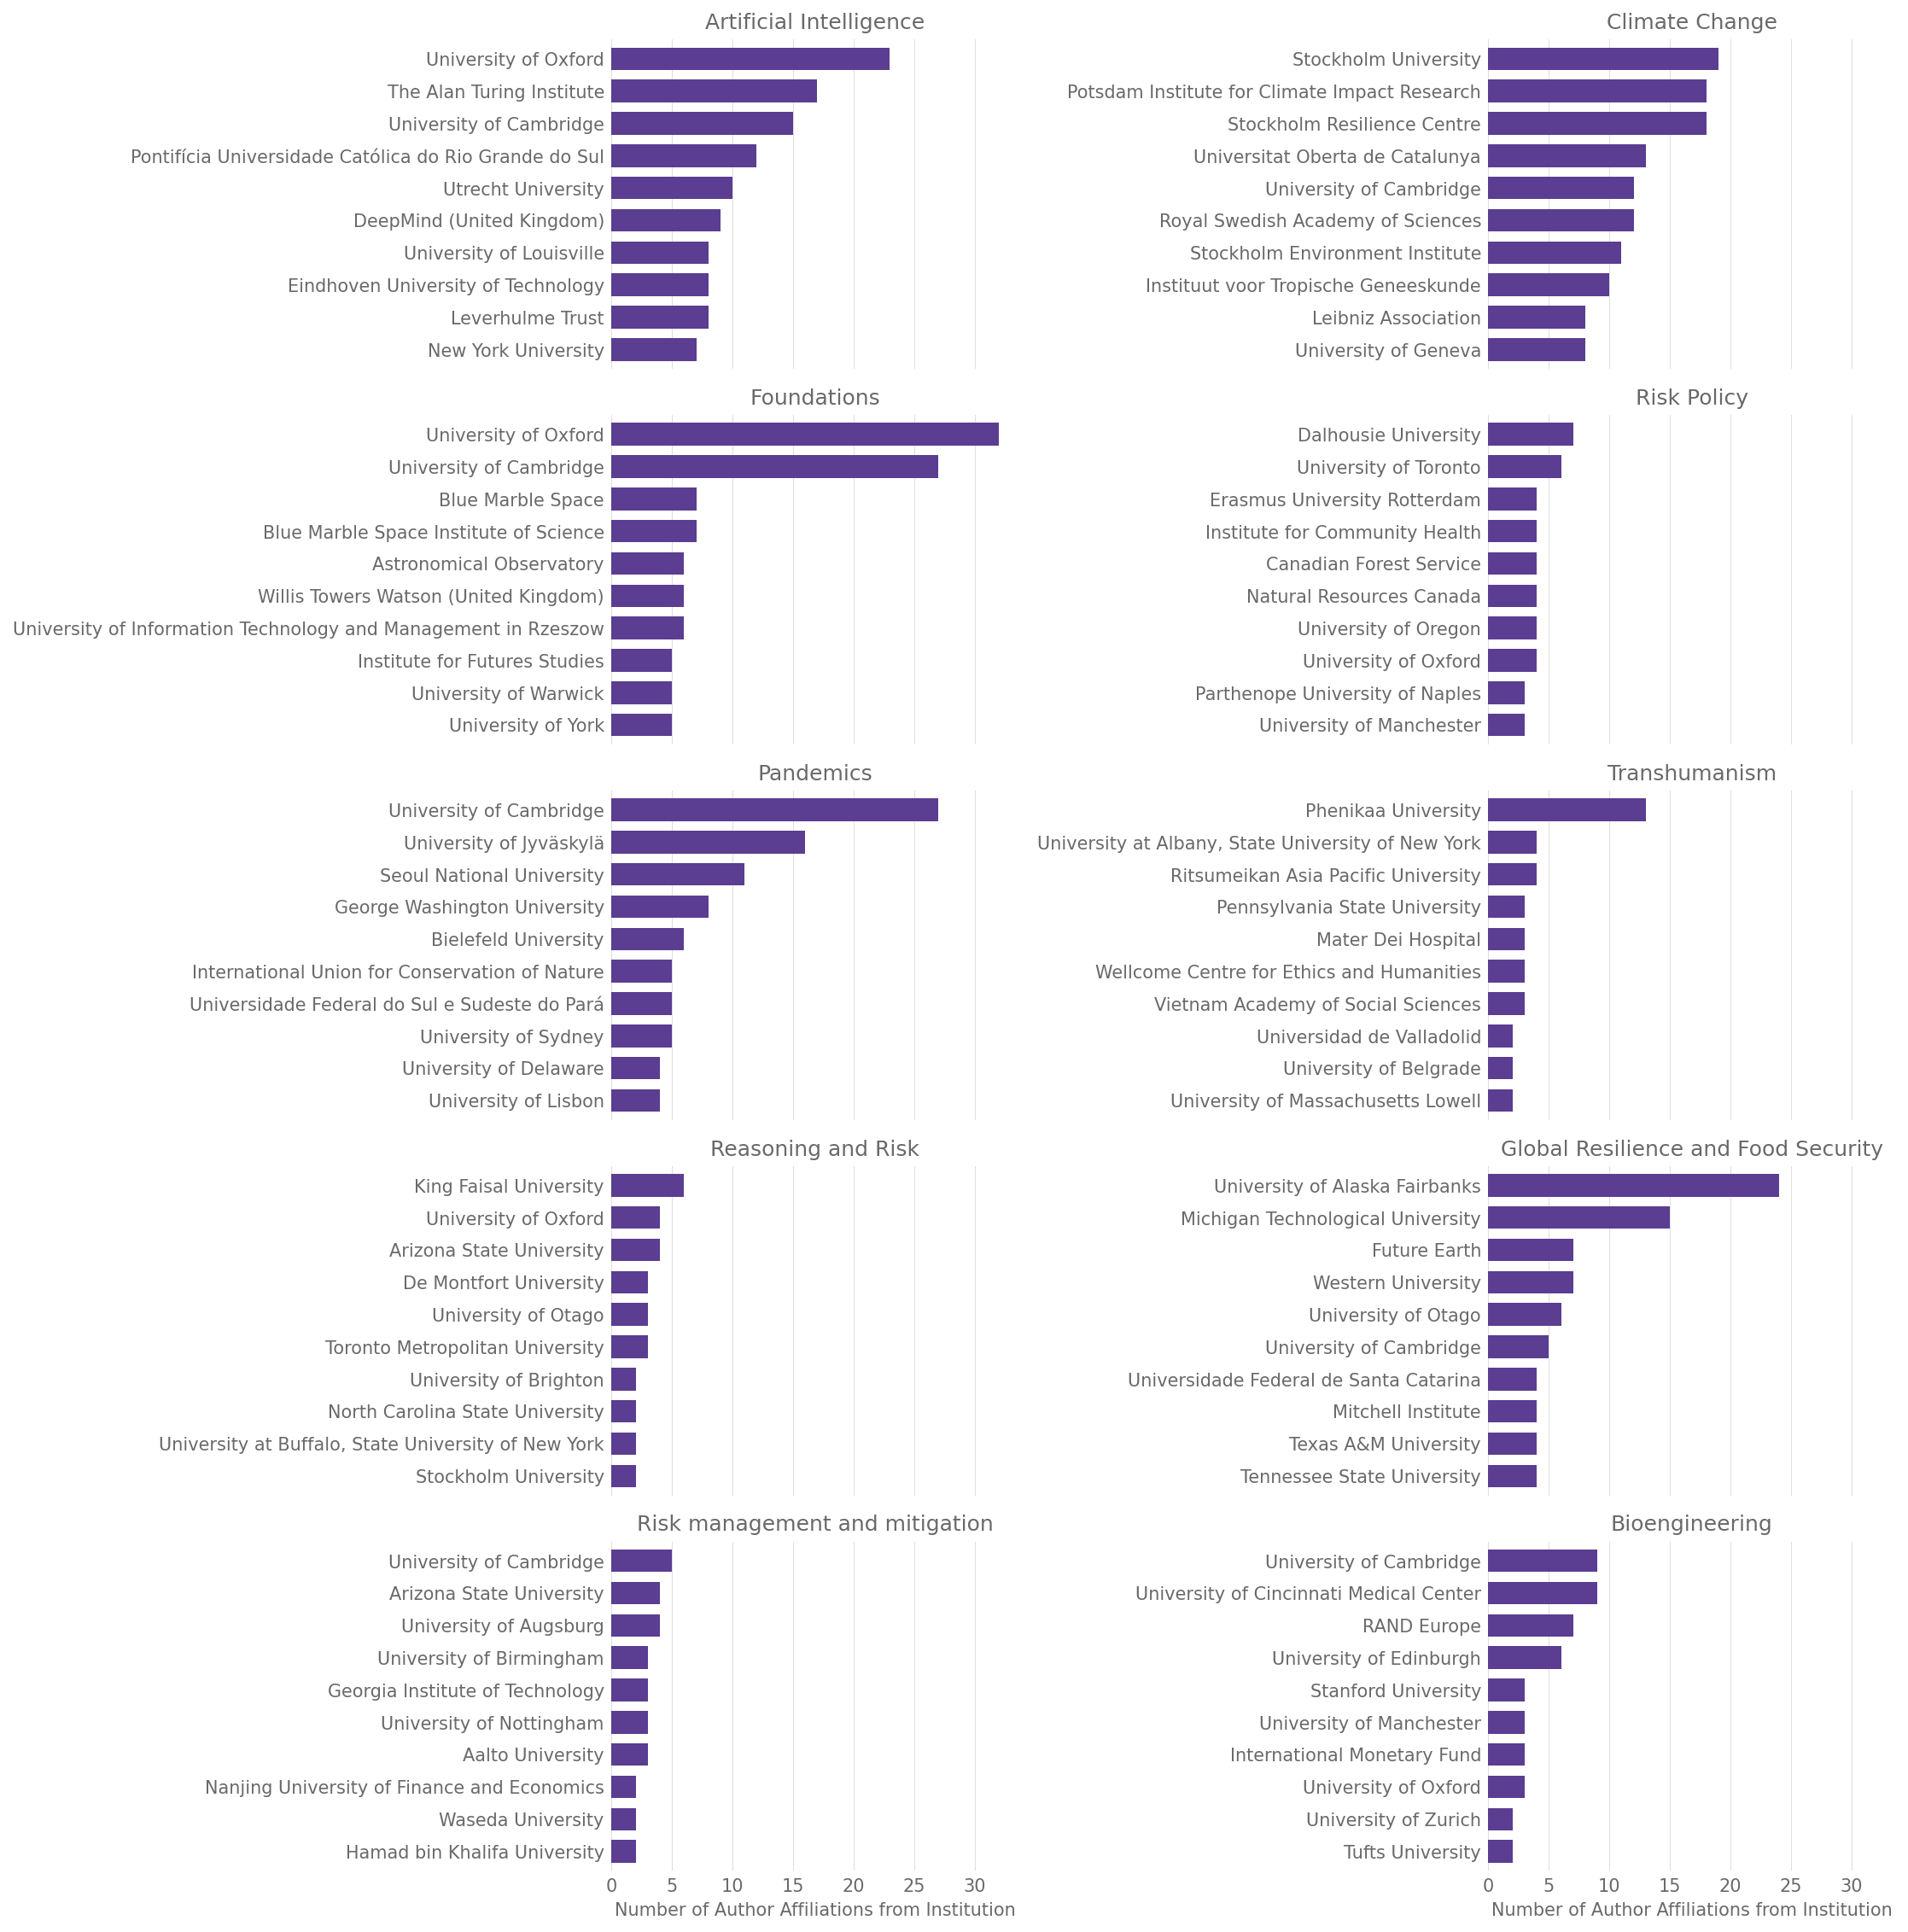

In [12]:
# Plot the main source by cluster
fig, axes = plt.subplots(5,2, figsize=(15, 15), sharex=True)
axes = axes.flatten()

for i, (cluster_name, cluster) in enumerate(remerged_data.groupby("Cluster")):
    # Remove the rows with no organizations
    cluster = cluster[cluster["authorships.institutions"].notnull()].copy()

    def extract_display_names(df, column_name):
        def parse_and_extract(dict_string):
            try:
                # Use ast.literal_eval to safely evaluate the dictionary string
                dict_obj = ast.literal_eval(dict_string)
                return dict_obj['display_name']
            except:
                return None

        # Split the column by '|' and apply the parsing function
        df['display_names'] = df[column_name].str.split('|').apply(
            lambda x: [parse_and_extract(d) for d in x if d]
        )

        return df


    cluster = extract_display_names(cluster, 'authorships.institutions')

    # Create a list of all the organizations
    all_orgs = [org for org_list in cluster['display_names'] for org in org_list]
    # Remove the empty organizations
    all_orgs = [org for org in all_orgs if org != ""]
    # Remove "Open Targets", "Deutsche Gesellschaft für Internationale Zusammenarbeit", "Global Environment Facility" and "Action Network"
    # as they are all false positives from the same entry
    all_orgs = [org for org in all_orgs if org != "Open Targets"]
    all_orgs = [org for org in all_orgs if org != "Deutsche Gesellschaft für Internationale Zusammenarbeit"]
    all_orgs = [org for org in all_orgs if org != "Action Network"]
    all_orgs = [org for org in all_orgs if org != "Global Environment Facility"]

    # Count how often each organization appears
    org_counts = pd.Series(all_orgs).value_counts()
    org_counts.head(10).sort_values().plot(kind="barh", color=main_color, width=0.7, ax=axes[i])
    # Remove the y-axis grid
    axes[i].yaxis.grid(False)
    # Add the title
    axes[i].set_title(cluster_names[cluster_name])
    axes[i].set_ylabel("")

fig.tight_layout()


# Add the x-axis label
axes[-2].set_xlabel("Number of Author Affiliations from Institution")
axes[-1].set_xlabel("Number of Author Affiliations from Institution")